#Libraries

In [159]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Read and Explore the data 

In [160]:
data = pd.read_csv(r'D:\Projects\Data Science Projects\Music Genre\untitled\Files\music_dataset_mod.csv')

data.info()
data_copy = data.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

Unique Music Genres and Their Distribution:
Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64


C:\Users\Hashim\AppData\Local\Temp\ipykernel_6536\1891174978.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette=colors)


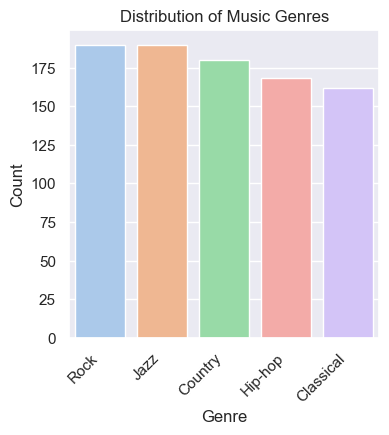

In [161]:

genre_distribution = data_copy['Genre'].value_counts()

# Display the unique music genres and their distribution
print("Unique Music Genres and Their Distribution:")
print(genre_distribution)

# Define a color palette for the bar plot
colors = sns.color_palette('pastel', n_colors=len(genre_distribution))

plt.figure(figsize=(4, 4))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Music Genres')
plt.ylabel('Count')
plt.show()


## Clean the data 

In [162]:

# Remove rows with missing genre labels
data_cleaned = data_copy.dropna().copy()


# Split the data into features and target
x =data_cleaned .iloc[:, :-1]
y = data_cleaned .iloc[:,-1]


# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

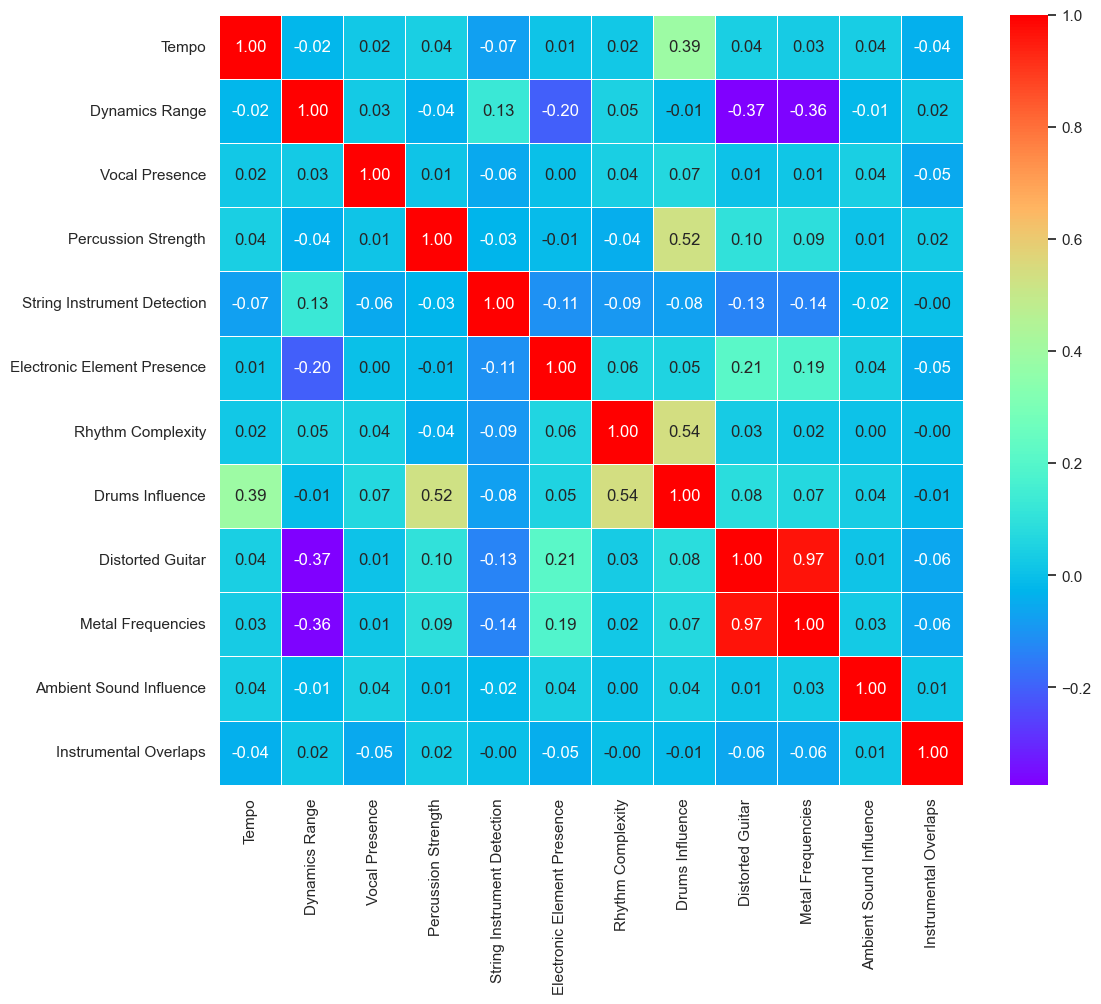

In [163]:
correlation_matrix = x.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt='.2f', linewidths=.5)

# Show the plot
plt.show()



In [164]:
# Add a constant term to the features (required for statsmodels)
vif = sm.add_constant(x)

# Fit a multiple regression model
model = sm.OLS(y_encoded, x).fit()

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])]

# Print the VIF values
print(vif_data)



                       Variable        VIF
0                         const  75.694696
1                         Tempo   1.462287
2                Dynamics Range   1.200800
3                Vocal Presence   1.015762
4           Percussion Strength   2.027083
5   String Instrument Detection   1.050686
6   Electronic Element Presence   1.086387
7             Rhythm Complexity   2.104336
8               Drums Influence   3.545899
9              Distorted Guitar  15.346415
10            Metal Frequencies  15.108706
11      Ambient Sound Influence   1.009369
12        Instrumental Overlaps   1.011225


## Split the data


In [165]:
# Fit and transform the data

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)


## Without PCA

In [166]:

x_train , x_test , y_train , y_test =train_test_split(x_scaled ,y_encoded, test_size=0.3, random_state=42 ,)
print(x_test.shape)

# Initialize logistic regression model with a higher max_iter value
logreg_model_original = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

# Fit the model on the training data
logreg_model_original.fit(x_train, y_train)

y_pred_original = logreg_model_original.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_original)
print(f'Accuracy: {accuracy:.2f}')


# Calculate precision for the 'Hip-hop' class without PCA
precision_original = precision_score(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred_original), labels=['Hip-hop'], average='micro')


print(f'Precision: {precision_original}')


print("\nClassification Report with Original Features:\n", classification_report(y_test, y_pred_original))



(267, 12)
Accuracy: 0.53
Precision: 0.4489795918367347

Classification Report with Original Features:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.33      0.25      0.28        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267


# With PCA

In [167]:
pca = PCA()
pca.fit(x_scaled)
x_pca = pca.fit_transform(x_scaled)
# Calculate the cumulative explained variance ratio


cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance_ratio)
# Find the number of components needed for at least 80% variance
num_components_80_percent = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"Number of components for 80% variance: {num_components_80_percent}")

[0.20063071 0.35125878 0.44495077 0.53191983 0.61728037 0.69895416
 0.77843687 0.85457161 0.92457383 0.98453586 0.99720895 1.        ]
Number of components for 80% variance: 8


In [168]:
pca= PCA(n_components=8)
x_pca= pca.fit_transform(x_scaled)

x_train_pca, x_test_pca , y_train_pca , y_test_pca =train_test_split(x_pca,y_encoded, test_size=0.3, random_state=42 ,)
print('x_test shape',x_test.shape)

# Initialize logistic regression
logreg_model_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

# Fit the model on the training data
logreg_model_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = logreg_model_pca.predict(x_test_pca)

accuracy = accuracy_score(y_test_pca, y_pred_pca )
print(f'Accuracy: {accuracy:.2f}')


print("\nClassification Report with PCA Features:\n", classification_report(y_test_pca, y_pred_pca))

                                                                                 # Calculate precision for the 'Hip-hop' class with PCA
precision_pca = precision_score(label_encoder.inverse_transform(y_test_pca), label_encoder.inverse_transform(y_pred_pca), labels=['Hip-hop'], average='micro')

# Calculate the difference in precision
precision_difference = precision_pca - precision_original

print(f'Precision without PCA for "Hip-hop" class: {precision_original:.2f}')
print(f'Precision with PCA for "Hip-hop" class: {precision_pca:.2f}')
print(f'Difference in precision for "Hip-hop" class: {precision_difference:.2f}')


x_test shape (267, 12)
Accuracy: 0.54

Classification Report with PCA Features:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267

Precision without PCA for "Hip-hop" class: 0.45
Precision with PCA for "Hip-hop" class: 0.49
Difference in precision for "Hip-hop" class: 0.04


In [185]:
unknown_genre =  data_copy[data_copy['Genre'].isnull()].copy()
x_unknown= unknown_genre.drop(columns=['Genre'])
x_unknown_scaled= scaler.transform(x_unknown)
x_unknown_pca= pca.transform(x_unknown_scaled)

y_pred_pca = logreg_model_pca.predict(x_unknown_pca)

y_pred_inverse= label_encoder.inverse_transform(y_pred_pca)
unknown_genre['Genre']=y_pred_inverse

print(unknown_genre['Genre'])

13     Classical
18       Country
22       Country
31          Rock
42          Rock
         ...    
991      Hip-hop
992         Rock
993      Hip-hop
994      Hip-hop
995    Classical
Name: Genre, Length: 110, dtype: object
